In [1]:
%load_ext autoreload
%autoreload 2

import keras
import keras.applications

Using TensorFlow backend.


In [3]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
xception = keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
resnet50 = keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
mobilenet = keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [65]:
densenet = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=(32, 32, 3), pooling=None, classes=1000)

In [2]:
densenet32x32 = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=(32, 32, 3), pooling=None, classes=1000)
x = densenet32x32.get_layer(index=-1).output
top = keras.layers.Dense(1000, activation="softmax")(x)
densenet32x32_withtop = keras.models.Model(inputs=densenet32x32.inputs, outputs=top)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
nasnet = keras.applications.nasnet.NASNetMobile(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


Predicted class:
steel_arch_bridge (n04311004) with probability 0.43


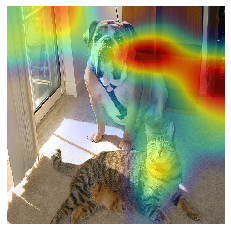

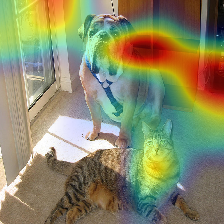

In [12]:
import eli5
import os
import matplotlib.pyplot as plt

def show_dir(model, img_dir, *args, **kwargs):
    imgs = os.listdir(img_dir)
    for i, img in enumerate(imgs):
        I = show(model, os.path.join(img_dir, img), *args, **kwargs)

def show(model, doc, *args, preprocess=False, preprocessing=None, **kwargs):
    if preprocess:
        doc = eli5.keras.preprocess_image(img, model, preprocessing=None)
    E = eli5.explain_prediction(model, doc, *args, **kwargs)
    I = eli5.formatters.image.format_as_image(E)
    return I

img = 'examples/cat_dog.jpg'
img2 = 'examples/170997360_8193925eef.jpg'

# show(vgg16, img, layers="block5_conv3", preprocessing=keras.applications.vgg16.preprocess_input)

# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[282], target_decoder=keras.applications.xception.decode_predictions) # 'tiger cat'
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[904], target_decoder=keras.applications.xception.decode_predictions) # 'window screen'
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[59], target_decoder=keras.applications.xception.decode_predictions) # 'vine snake'
# show_dir(xception, 'examples/', layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input)

# show(resnet50, img, preprocessing=keras.applications.resnet50.preprocess_input, layer=-3)

# mobilenet.summary()
# show(mobilenet, img, preprocessing=keras.applications.mobilenet.preprocess_input, layer=-3)
# -7 -> works
# -6 -> too many indices
# -5 downwards (even conv_preds) -> all red
# show(mobilenet, img, preprocessing=keras.applications.mobilenet.preprocess_input, layer=-7)

# from keras.datasets import cifar10
# import numpy as np
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# # print(x_test.shape)
# x = x_test[1]
# x = np.expand_dims(x, axis=0)
# densenet32x32_withtop.summary()
# show(densenet32x32_withtop, x, preprocess=False, layer="conv1/conv")
# show(densenet32x32_withtop, x, preprocess=False, prediction_decoder=keras.applications.densenet.decode_predictions, layer=-10)
# -> ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 1, 1, 1000)

# TESTMODELS = [
# #     (xception, keras.applications.xception.preprocess_input, "block14_sepconv2_act"),
#     (resnet50, keras.applications.resnet50.preprocess_input),
#     (mobilenet, keras.applications.mobilenet.preprocess_input),
#     (densenet, keras.applications.densenet.preprocess_input),
#     (nasnet, keras.applications.nasnet.preprocess_input),
# ]
# for model, preprocess_fn in TESTMODELS:
#     print(model.name)
#     show_dir(model, 'examples', layers="block14_sepconv2_act", preprocessing=preprocess_fn)
#     print('='*50, end='\n\n\n')

# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show(resnet50, 'examples/cat_dog.jpg', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)

# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
show(nasnet, img, preprocess=True, prediction_decoder=keras.applications.nasnet.decode_predictions, preprocessing=keras.applications.nasnet.preprocess_input, layer=-3)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

model = Sequential([
    Dense(32, input_shape=(24,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

print(model.summary())
x = np.ones((1, 24))

import eli5
eli5.explain_prediction(model, x)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                800       
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________
None
dispatched


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [18]:
def f(a=10): return a*2
def g(**kwargs): 
    return f(**kwargs)
    print(kwargs)
g(a=4, b=3)

TypeError: f() got an unexpected keyword argument 'b'

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 166s 1us/step


In [3]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 146s 1us/step


In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [29]:
from IPython.core.display import display, HTML
display(HTML('<img src="./examples/cat_dog.jpg"></img>'))

In [32]:
%%html
<canvas id="myCanvas" width="200" height="100" style="border:1px solid #000000;">
    var c = document.getElementById("myCanvas");
    var ctx = c.getContext("2d");
    ctx.moveTo(0, 0);
    ctx.lineTo(200, 100);
    ctx.stroke(); 
</canvas>
<!-- error: [W 13:28:10.046 NotebookApp] 404 GET /static/components/proptypes/index.js.map (127.0.0.1) 421.81ms referer=None
-->

In [32]:
%%html
'<img src="./examples/cat_dog.jpg" width=224 height=224></img>

import tensorflow as tf
import numpy as np
a = np.array([2, 3])
b = np.array([4, 5])
with tf.Session().as_default():
    print(tf.multiply(a, b).eval())
print(a*b)